In [1]:
# install package, library
# !pip install keras

#Import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

np.random.seed(0)

#Data

In [3]:
# MNIST dataset shape
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print("Train X: ", str(train_X.shape))
print("Train y: ", str(train_y.shape))
print("Test X:  ", str(test_X.shape))
print("Test y:  ", str(test_y.shape))

Train X:  (60000, 28, 28)
Train y:  (60000,)
Test X:   (10000, 28, 28)
Test y:   (10000,)


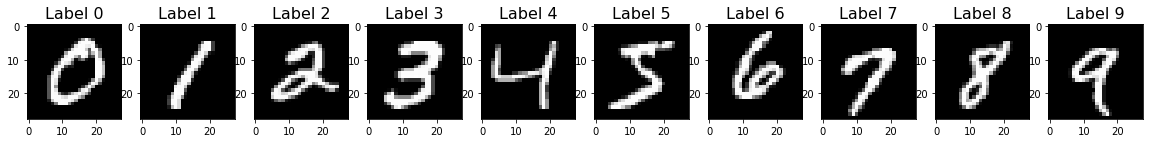

In [4]:
# Visualize sample
num_classes = 10

f, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(0, num_classes):
  sample = train_X[train_y == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label {}".format(i), fontsize=16)

In [5]:
# Check null and missing value in train and test set

print(np.isnan(np.sum(train_X)))
print(np.isnan(np.sum(test_X)))

False
False


# Preprocessing

In [6]:
# Normalization

train_X = train_X / 255.0
test_X = test_X / 255.0

In [7]:
# First dataset: parsing dataset from 2D array image into 1D array

train_X1 = train_X.reshape(train_X.shape[0], -1)
test_X1 = test_X.reshape(test_X.shape[0], -1)

# Second dataset: remain 2D array image

train_X2 = train_X
test_X2 = test_X

In [8]:
# Encoding label

train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)

In [9]:
# Split into train and valid set

X1_train, X1_test, y1_train, y1_test = train_test_split(train_X1, train_y, test_size=0.1, random_state=3)

X2_train, X2_test, y2_train, y2_test = train_test_split(train_X2, train_y, test_size=0.1, random_state=3)

print("Train shape (dataset 1): X = {}, y = {}".format(X1_train.shape, y1_train.shape))
print("Train shape (dataset 2): X = {}, y = {}".format(X2_train.shape, y2_train.shape))

Train shape (dataset 1): X = (54000, 784), y = (54000, 10)
Train shape (dataset 2): X = (54000, 28, 28), y = (54000, 10)


# Model



1.   Model receiving 1D array



In [10]:
input_shape1 = (784,)

model1 = Sequential()
model1.add(Dense(units=32, activation='relu', input_shape=input_shape1))
model1.add(Dense(units=32, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(units=10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


2. Model receiving 2D array

In [11]:
input_shape2 = (28, 28, 1)

model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=input_shape2))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
__________________________________________________

# Training

1. Model 1D

In [12]:
batch_size = 512
epochs = 50

model1.fit(x=X1_train, y=y1_train, batch_size=batch_size, epochs=epochs)

test_loss, test_acc = model1.evaluate(X1_test, y1_test)

print('Accuracy: {}, Loss: {}'.format(test_acc, test_loss))

Epoch 1/50
106/106 [==============================] - 3s 12ms/step - loss: 1.2638 - accuracy: 0.6028
Epoch 2/50
106/106 [==============================] - 1s 11ms/step - loss: 0.5517 - accuracy: 0.8384
Epoch 3/50
106/106 [==============================] - 1s 10ms/step - loss: 0.4252 - accuracy: 0.8782
Epoch 4/50
106/106 [==============================] - 1s 11ms/step - loss: 0.3616 - accuracy: 0.8955
Epoch 5/50
106/106 [==============================] - 1s 10ms/step - loss: 0.3223 - accuracy: 0.9080
Epoch 6/50
106/106 [==============================] - 1s 11ms/step - loss: 0.2970 - accuracy: 0.9154
Epoch 7/50
106/106 [==============================] - 1s 9ms/step - loss: 0.2707 - accuracy: 0.9224
Epoch 8/50
106/106 [==============================] - 1s 11ms/step - loss: 0.2496 - accuracy: 0.9291
Epoch 9/50
106/106 [==============================] - 1s 11ms/step - loss: 0.2362 - accuracy: 0.9327
Epoch 10/50
106/106 [==============================] - 1s 11ms/step - loss: 0.2244 - accurac

2. Model 2D

In [13]:
batch_size = 512
epochs = 10

model2.fit(x=X2_train, y=y2_train, batch_size=batch_size, epochs=epochs)

test_loss, test_acc = model2.evaluate(X2_test, y2_test)

print('Accuracy: {}, Loss: {}'.format(test_acc, test_loss))

Epoch 1/10
106/106 [==============================] - 23s 215ms/step - loss: 0.6981 - accuracy: 0.8295
Epoch 2/10
106/106 [==============================] - 23s 214ms/step - loss: 0.2499 - accuracy: 0.9282
Epoch 3/10
106/106 [==============================] - 24s 223ms/step - loss: 0.1780 - accuracy: 0.9492
Epoch 4/10
106/106 [==============================] - 23s 215ms/step - loss: 0.1373 - accuracy: 0.9604
Epoch 5/10
106/106 [==============================] - 23s 213ms/step - loss: 0.1146 - accuracy: 0.9681
Epoch 6/10
106/106 [==============================] - 23s 213ms/step - loss: 0.1017 - accuracy: 0.9713
Epoch 7/10
106/106 [==============================] - 23s 213ms/step - loss: 0.0913 - accuracy: 0.9736
Epoch 8/10
106/106 [==============================] - 23s 215ms/step - loss: 0.0840 - accuracy: 0.9755
Epoch 9/10
106/106 [==============================] - 23s 215ms/step - loss: 0.0781 - accuracy: 0.9774
Epoch 10/10
188/188 [==============================] - 1s 6ms/step - loss

# Predict

1. Model 1D

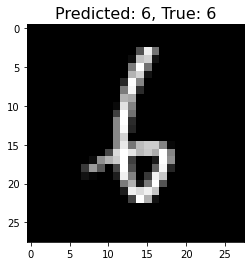

In [14]:
y_pred1 = model1.predict(test_X1)
y_pred1_classes = np.argmax(y_pred1, axis=1)

# Single Example
random_idx = np.random.choice(len(test_X1))
x_sample = test_X[random_idx]
y_true = np.argmax(test_y, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred1_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

2. Model 2D

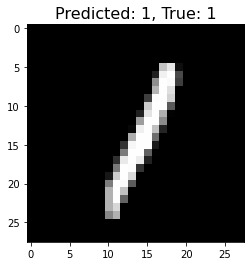

In [15]:
y_pred2 = model2.predict(test_X2)
y_pred2_classes = np.argmax(y_pred1, axis=1)

# Single Example
random_idx = np.random.choice(len(test_X2))
x_sample = test_X[random_idx]
y_true = np.argmax(test_y, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred2_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

# Confusion matrix

Text(0.5, 1.0, 'Confusion matrix model 2D')

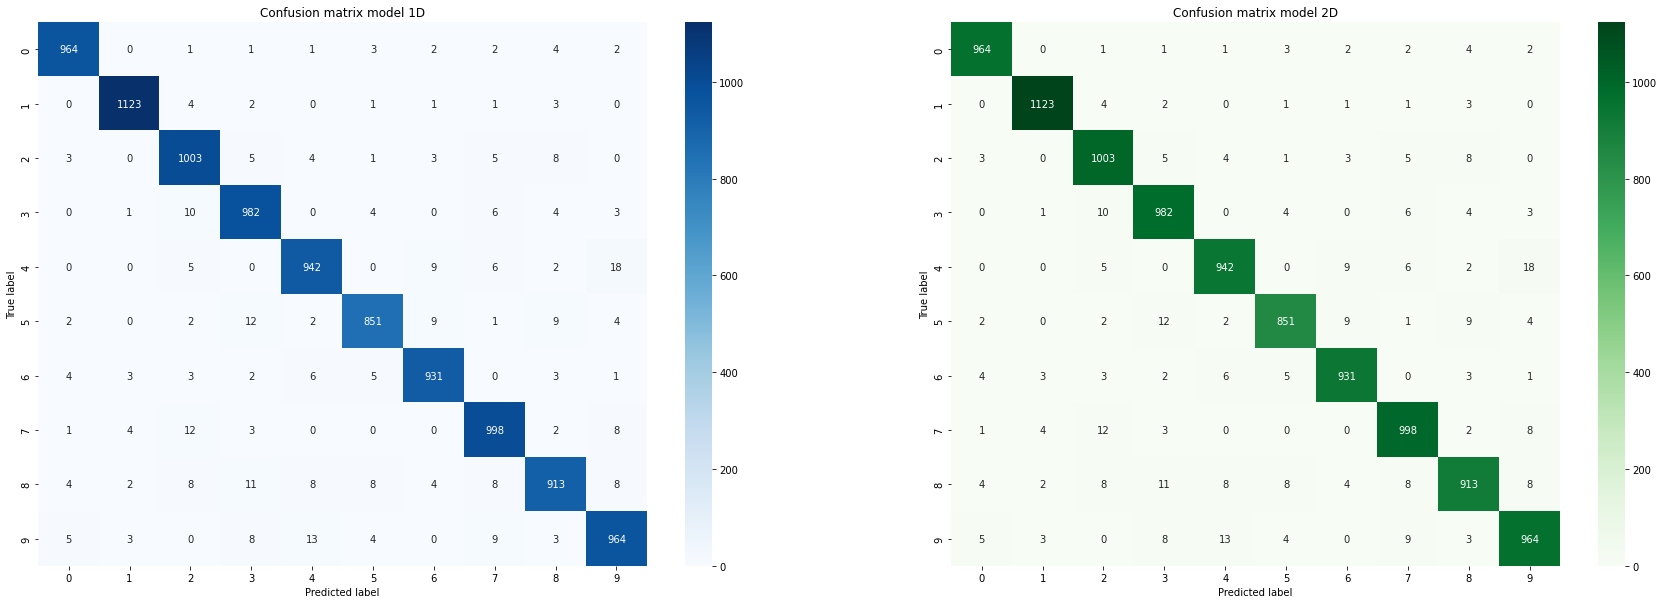

In [21]:
mtx1 = confusion_matrix(y_true, y_pred1_classes)
mtx2 = confusion_matrix(y_true, y_pred2_classes)

fig, ax = plt.subplots(1, 2, figsize=(30,10))

ax[0] = sns.heatmap(mtx1, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_xlabel("Predicted label")
ax[0].set_ylabel("True label")
ax[0].set_title("Confusion matrix model 1D")

ax[1] = sns.heatmap(mtx2, annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_xlabel("Predicted label")
ax[1].set_ylabel("True label")
ax[1].set_title("Confusion matrix model 2D")